In [ ]:
# Importa las bibliotecas necesarias

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import preprocessing
import pandas as pd
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import graphviz

In [ ]:
# Lee el archivo CSV

In [15]:
data = pd.read_csv('Cleaned-Data.csv')

In [ ]:
# Elimina la columna 'Country' ya que no la necesitamos para el modelo

In [16]:
data = data.drop(['Country'], axis=1)

In [ ]:
# Divide el conjunto de datos en características (X) y etiquetas (y)

In [17]:
X = data.drop(['Severity_None', 'Severity_Mild', 'Severity_Moderate', 'Severity_Severe'], axis=1)
y = data[['Severity_None', 'Severity_Mild', 'Severity_Moderate', 'Severity_Severe']]

In [ ]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializa el clasificador de árbol de decisión

In [19]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Entrena el modelo

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Visualiza el árbol de decisión en texto

In [26]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

clf = DecisionTreeClassifier(max_depth=5)  
clf.fit(X_train, y_train)

|--- Age_0-9 <= 0.50
|   |--- Difficulty-in-Breathing <= 0.50
|   |   |--- Age_10-19 <= 0.50
|   |   |   |--- None_Sympton <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- None_Sympton >  0.50
|   |   |   |   |--- class: 2
|   |   |--- Age_10-19 >  0.50
|   |   |   |--- Runny-Nose <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- Runny-Nose >  0.50
|   |   |   |   |--- class: 1
|   |--- Difficulty-in-Breathing >  0.50
|   |   |--- Tiredness <= 0.50
|   |   |   |--- Contact_No <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Contact_No >  0.50
|   |   |   |   |--- class: 2
|   |   |--- Tiredness >  0.50
|   |   |   |--- Age_10-19 <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- Age_10-19 >  0.50
|   |   |   |   |--- class: 3
|--- Age_0-9 >  0.50
|   |--- None_Experiencing <= 0.50
|   |   |--- Dry-Cough <= 0.50
|   |   |   |--- Fever <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Fever >  0.50
|   |   |   |   |--- class: 2
|   |   |--- Dry-Cough >  0.50
|  

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Visualizamos el árbol de decisión en formato gráfico

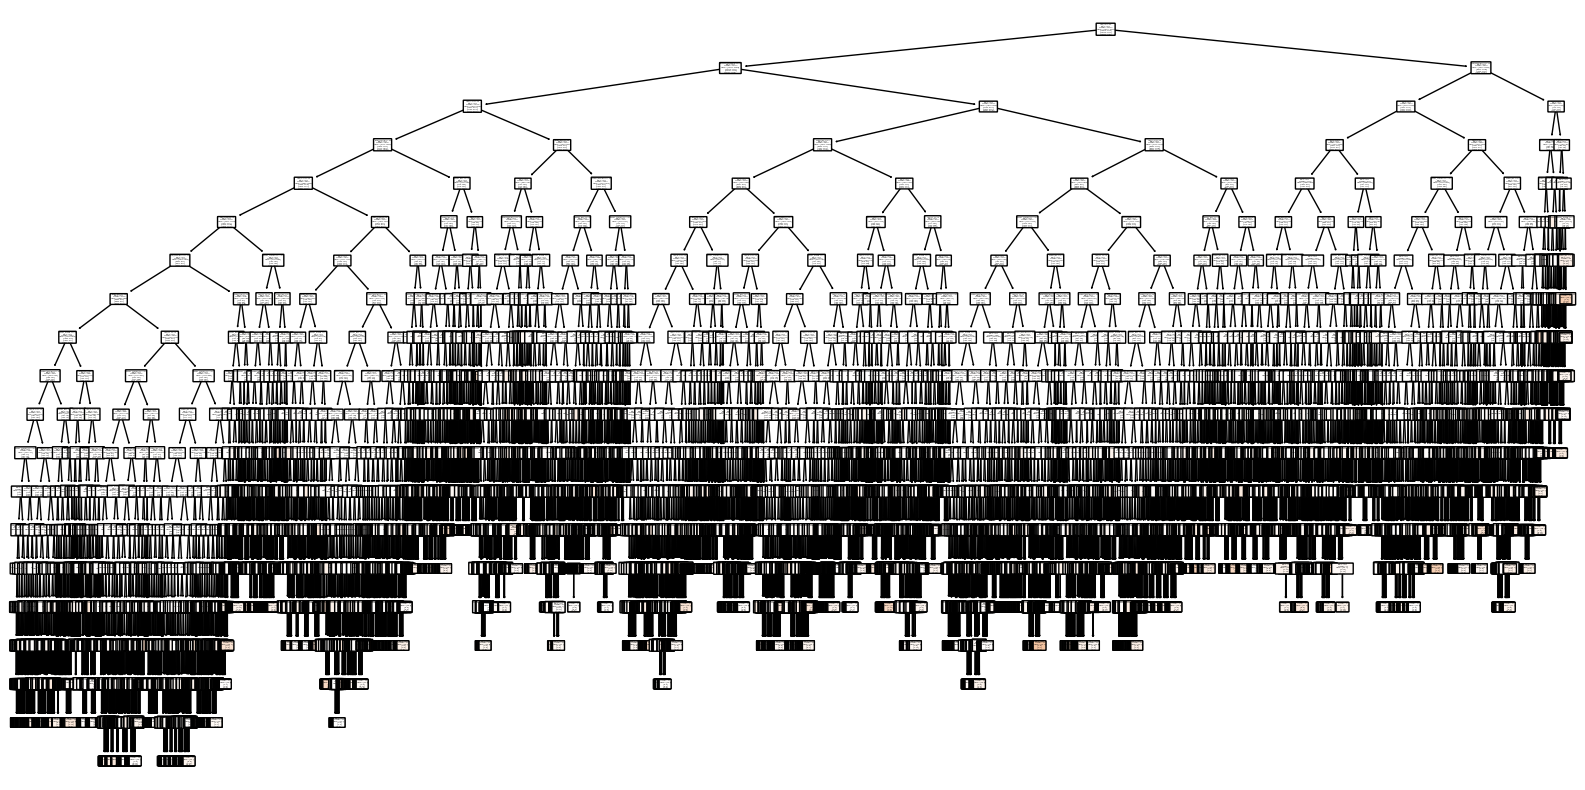

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['None', 'Mild', 'Moderate', 'Severe'], rounded=True)
plt.show()

In [ ]:
#Limitamos la profundidad del árbol para evitar que crezca demasiado. Puedes hacer esto estableciendo el parámetro max_depth al construir el árbol.

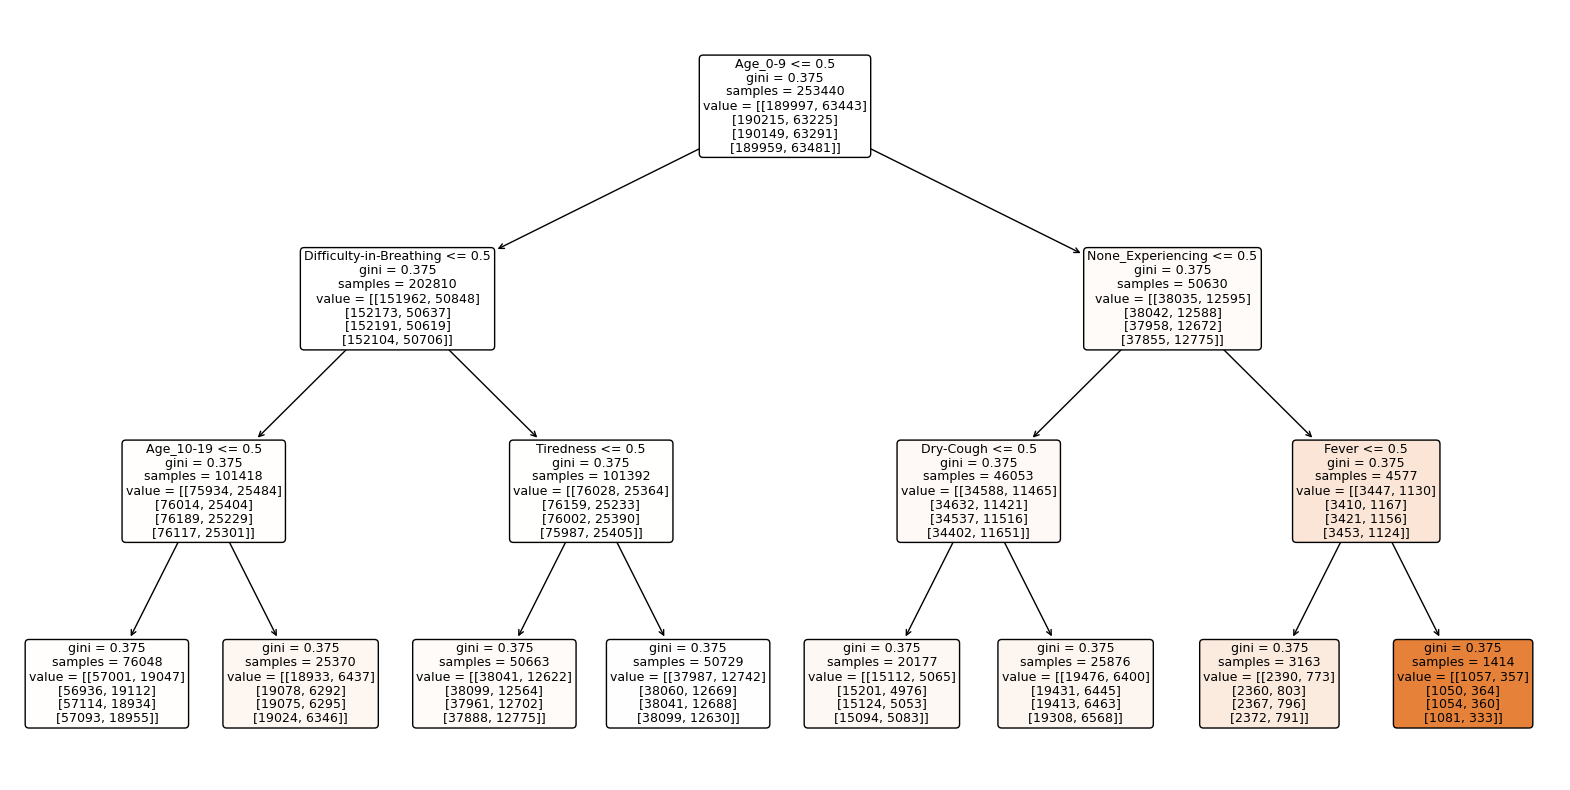

In [23]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['None', 'Mild', 'Moderate', 'Severe'], rounded=True)
plt.show()